# Задание 11

In [110]:
import sys
sys.version

'3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]'

In [111]:
import numpy as np
np.__version__

'1.22.4'

In [112]:
import pandas as pd
pd.__version__

'2.1.1'

In [113]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.__version__

'3.8.0'

In [114]:
import seaborn as sns
sns.__version__

'0.13.0'

In [115]:
sns.set_style('darkgrid')

In [116]:
%matplotlib inline

In [117]:
import sqlite3

In [118]:
who

ax	 ax2	 axes	 col	 d1	 d2	 d3	 d4	 datetime	 
df	 dfcsv1	 dfg	 dfv	 ds_hw_grow	 ds_hw_pivot	 fig	 ggg	 group	 
grouped	 i	 ii	 matplotlib	 max_price	 max_price_date	 max_rg	 max_rg_date	 maxmax	 
maxmin	 min_price	 min_price_date	 min_rg	 min_rg_date	 minmin	 n_cols	 n_rows	 n_vyp	 
name	 np	 pd	 plt	 result	 row	 sns	 sqlite3	 sys	 
vypusk	 


# Чтение исходных данных

In [119]:
%%time
d1 = pd.read_csv('d1.csv', sep=', ', header=None, names=['id_ra', 'name_ra'], engine='python')

d1['id_ra']=d1['id_ra'].str.replace("'","")
d1['id_ra']=d1['id_ra'].str.replace("(","")
d1['id_ra']=d1['id_ra'].str.replace(",","")
d1['name_ra']=d1['name_ra'].str.replace("'","")
d1['name_ra']=d1['name_ra'].str.replace(")","")
d1

CPU times: total: 0 ns
Wall time: 2.03 ms


,id_ra,name_ra
0,1,Рейтинговое агентство 1
1,2,Рейтинговое агентство 2
2,3,Рейтинговое агентство 3


In [120]:
%%time
d2 = pd.read_csv('d2.csv', sep=', ', header=None, names=['id_sc', 'id_ra', 'name_sc'], engine='python')

d2['id_sc']=d2['id_sc'].str.replace("'","")
d2['id_sc']=d2['id_sc'].str.replace("(","")
d2['id_sc']=d2['id_sc'].str.replace(",","")
d2['id_ra']=d2['id_ra'].str.replace("'","")
d2['name_sc']=d2['name_sc'].str.replace("'","")
d2['name_sc']=d2['name_sc'].str.replace(")","")
d2

CPU times: total: 0 ns
Wall time: 3.12 ms


,id_sc,id_ra,name_sc
0,1,1,Суверенная шкала
1,2,2,Суверенная шкала
2,3,3,Суверенная шкала
3,4,1,Международная шкала
4,5,2,Международная шкала
5,6,3,Международная шкала


In [121]:
%%time
d3 = pd.read_csv('d3.csv', sep=', ', header=None,
                 names=['data1', 'ВыпускID', 'Выпуск', 'id_ra', 'id_sc', 'Рейтинг'], engine='python')

d3['data1']=d3['data1'].str.replace("'","")
d3['data1']=d3['data1'].str.replace("(","")
d3['data1']=d3['data1'].str.replace(",","")
d3['ВыпускID']=d3['ВыпускID'].str.replace("'","")
d3['ВыпускID']=d3['ВыпускID'].str.replace(" Выпуск ","")
d3['Выпуск']=d3['Выпуск'].str.replace("'","")
d3['id_ra']=d3['id_ra'].str.replace("'","")
d3['id_sc']=d3['id_sc'].str.replace("'","")
d3['Рейтинг']=d3['Рейтинг'].str.replace("'","")
d3['Рейтинг']=d3['Рейтинг'].str.replace(")","")
d3['Рейтинг']=d3['Рейтинг'].str.replace(" ","")
d3

CPU times: total: 0 ns
Wall time: 6.98 ms


,data1,ВыпускID,Выпуск,id_ra,id_sc,Рейтинг
0,2021-08-17,1,XS00000AA001,1,1,NR
1,2021-08-17,2,XS00000AA002,2,2,NR
2,2021-08-17,2,XS00000AA002,3,3,Withdrawn
3,2021-08-16,3,XS00000AA003,1,1,NR
4,2021-08-16,4,XS00000AA004,1,1,NR
...,...,...,...,...,...,...
596,2021-06-03,111,XS00000AA111,1,4,A-
597,2021-06-03,52,XS00000AA052,2,5,BB+
598,2021-06-03,53,XS00000AA053,2,5,BB+
599,2021-06-03,51,XS00000AA051,2,5,BB+


In [122]:
%%time
d4 = pd.read_csv('d4.csv', sep=',', header=None, names=['Рейтинг', 'РейтингID'])
d4

CPU times: total: 0 ns
Wall time: 1.99 ms


,Рейтинг,РейтингID
0,AAA,25
1,Aaa,25
2,AA+,24
3,Aa1,24
4,AA,23
5,Aa2,23
6,AA-,22
7,Aa3,22
8,A1,21
9,A+,21


In [123]:
dfcsv1 = d3.merge(d4, on='Рейтинг', how="left")
#dfcsv1 = d3
dfcsv1

,data1,ВыпускID,Выпуск,id_ra,id_sc,Рейтинг,РейтингID
0,2021-08-17,1,XS00000AA001,1,1,NR,1
1,2021-08-17,2,XS00000AA002,2,2,NR,1
2,2021-08-17,2,XS00000AA002,3,3,Withdrawn,0
3,2021-08-16,3,XS00000AA003,1,1,NR,1
4,2021-08-16,4,XS00000AA004,1,1,NR,1
...,...,...,...,...,...,...,...
596,2021-06-03,111,XS00000AA111,1,4,A-,19
597,2021-06-03,52,XS00000AA052,2,5,BB+,16
598,2021-06-03,53,XS00000AA053,2,5,BB+,16
599,2021-06-03,51,XS00000AA051,2,5,BB+,16


In [124]:
dfcsv1=dfcsv1.sort_values(by=['Выпуск', 'data1'])
dfcsv1

,data1,ВыпускID,Выпуск,id_ra,id_sc,Рейтинг,РейтингID
343,2021-06-24,1,XS00000AA001,1,1,A+,21
223,2021-07-13,1,XS00000AA001,3,6,A1,21
168,2021-07-21,1,XS00000AA001,2,5,A+,21
9,2021-08-16,1,XS00000AA001,2,5,NR,1
0,2021-08-17,1,XS00000AA001,1,1,NR,1
...,...,...,...,...,...,...,...
509,2021-06-10,113,XS00000AA113,1,1,AA-,22
507,2021-06-11,113,XS00000AA113,3,6,Aa2,23
464,2021-06-15,113,XS00000AA113,1,1,AA-,22
468,2021-06-15,113,XS00000AA113,2,5,AA-,22


In [125]:
#Формируем столбец с датой окончания действия рейтинга
dfcsv1 = dfcsv1.assign(data2=dfcsv1['data1'].shift(-1))
dfcsv1


,data1,ВыпускID,Выпуск,id_ra,id_sc,Рейтинг,РейтингID,data2
343,2021-06-24,1,XS00000AA001,1,1,A+,21,2021-07-13
223,2021-07-13,1,XS00000AA001,3,6,A1,21,2021-07-21
168,2021-07-21,1,XS00000AA001,2,5,A+,21,2021-08-16
9,2021-08-16,1,XS00000AA001,2,5,NR,1,2021-08-17
0,2021-08-17,1,XS00000AA001,1,1,NR,1,2021-06-24
...,...,...,...,...,...,...,...,...
509,2021-06-10,113,XS00000AA113,1,1,AA-,22,2021-06-11
507,2021-06-11,113,XS00000AA113,3,6,Aa2,23,2021-06-15
464,2021-06-15,113,XS00000AA113,1,1,AA-,22,2021-06-15
468,2021-06-15,113,XS00000AA113,2,5,AA-,22,2021-06-25


In [126]:
#Нет оснований полагать, ято рейтинг продержится больше одного дня
#проставляем продолжительность действия рейтинга для каждого выпуска - один день
for i in range(len(dfcsv1)-1):
    if dfcsv1.iloc[i, 2] != dfcsv1.iloc[i+1, 2]:
        dfcsv1.iloc[i, 7] = dfcsv1.iloc[i, 0]
#Понижаем рейтинг на 1 при значении Withdrawn(0)
    if dfcsv1.iloc[i, 6] == 0:
        dfcsv1.iloc[i, 6] = dfcsv1.iloc[i-1, 6] -1
#Оставляем рейтинг прежним при значении NR(1)
    if dfcsv1.iloc[i, 6] == 1:
        dfcsv1.iloc[i, 6] = dfcsv1.iloc[i-1, 6]
dfcsv1.iloc[len(dfcsv1)-1, 7] = dfcsv1.iloc[len(dfcsv1)-1, 0]
dfcsv1[dfcsv1['ВыпускID'] == ' Выпуск 112']




,data1,ВыпускID,Выпуск,id_ra,id_sc,Рейтинг,РейтингID,data2


In [127]:
#Добавляем столбец с наименованиями рейтинговых агенств
dfcsv1 = dfcsv1.merge(d1, on='id_ra')
dfcsv1

,data1,ВыпускID,Выпуск,id_ra,id_sc,Рейтинг,РейтингID,data2,name_ra
0,2021-06-24,1,XS00000AA001,1,1,A+,21,2021-07-13,Рейтинговое агентство 1
1,2021-08-17,1,XS00000AA001,1,1,NR,21,2021-08-17,Рейтинговое агентство 1
2,2021-06-24,2,XS00000AA002,1,4,A,20,2021-07-13,Рейтинговое агентство 1
3,2021-06-24,3,XS00000AA003,1,1,A+,21,2021-07-13,Рейтинговое агентство 1
4,2021-08-16,3,XS00000AA003,1,1,NR,20,2021-08-16,Рейтинговое агентство 1
...,...,...,...,...,...,...,...,...,...
596,2021-06-28,111,XS00000AA111,2,2,NR,19,2021-06-28,Рейтинговое агентство 2
597,2021-06-17,112,XS00000AA112,2,5,A-,19,2021-06-17,Рейтинговое агентство 2
598,2021-06-24,112,XS00000AA112,2,5,NR,19,2021-06-24,Рейтинговое агентство 2
599,2021-06-15,113,XS00000AA113,2,5,AA-,22,2021-06-25,Рейтинговое агентство 2


In [128]:
#Добавляем столбец с наименованиями рейтинговых шкал
dfcsv1 = dfcsv1.merge(d2, on=['id_sc','id_ra'])
dfcsv1

,data1,ВыпускID,Выпуск,id_ra,id_sc,Рейтинг,РейтингID,data2,name_ra,name_sc
0,2021-06-24,1,XS00000AA001,1,1,A+,21,2021-07-13,Рейтинговое агентство 1,Суверенная шкала
1,2021-08-17,1,XS00000AA001,1,1,NR,21,2021-08-17,Рейтинговое агентство 1,Суверенная шкала
2,2021-06-24,3,XS00000AA003,1,1,A+,21,2021-07-13,Рейтинговое агентство 1,Суверенная шкала
3,2021-08-16,3,XS00000AA003,1,1,NR,20,2021-08-16,Рейтинговое агентство 1,Суверенная шкала
4,2021-06-24,4,XS00000AA004,1,1,A+,21,2021-07-13,Рейтинговое агентство 1,Суверенная шкала
...,...,...,...,...,...,...,...,...,...,...
596,2021-06-21,108,XS00000AA108,2,2,BBB,18,2021-06-21,Рейтинговое агентство 2,Суверенная шкала
597,2021-06-21,109,XS00000AA109,2,2,BBB,18,2021-06-21,Рейтинговое агентство 2,Суверенная шкала
598,2021-06-21,110,XS00000AA110,2,2,BBB,18,2021-06-21,Рейтинговое агентство 2,Суверенная шкала
599,2021-06-21,111,XS00000AA111,2,2,A-,19,2021-06-28,Рейтинговое агентство 2,Суверенная шкала


In [129]:
dfcsv1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data1      601 non-null    object
 1   ВыпускID   601 non-null    object
 2   Выпуск     601 non-null    object
 3   id_ra      601 non-null    object
 4   id_sc      601 non-null    object
 5   Рейтинг    601 non-null    object
 6   РейтингID  601 non-null    int64 
 7   data2      601 non-null    object
 8   name_ra    601 non-null    object
 9   name_sc    601 non-null    object
dtypes: int64(1), object(9)
memory usage: 47.1+ KB


In [130]:
dfcsv1.describe().T

,count,mean,std,min,25%,50%,75%,max
РейтингID,601.0,18.470882,4.51031,4.0,17.0,19.0,21.0,25.0


In [131]:
dfcsv1.describe()

,РейтингID
count,601.000000
mean,18.470882
std,4.510310
min,4.000000
25%,17.000000
50%,19.000000
75%,21.000000
max,25.000000


In [132]:
from datetime import datetime

In [133]:
#Преобразуем столбец с датами из строкового в формат datetime
dfcsv1['data1'] = pd.to_datetime(dfcsv1['data1'], format="%Y-%m-%d")

In [134]:
dfcsv1['data1'] = pd.to_datetime(dfcsv1['data1'], format="%Y-%m-%d")

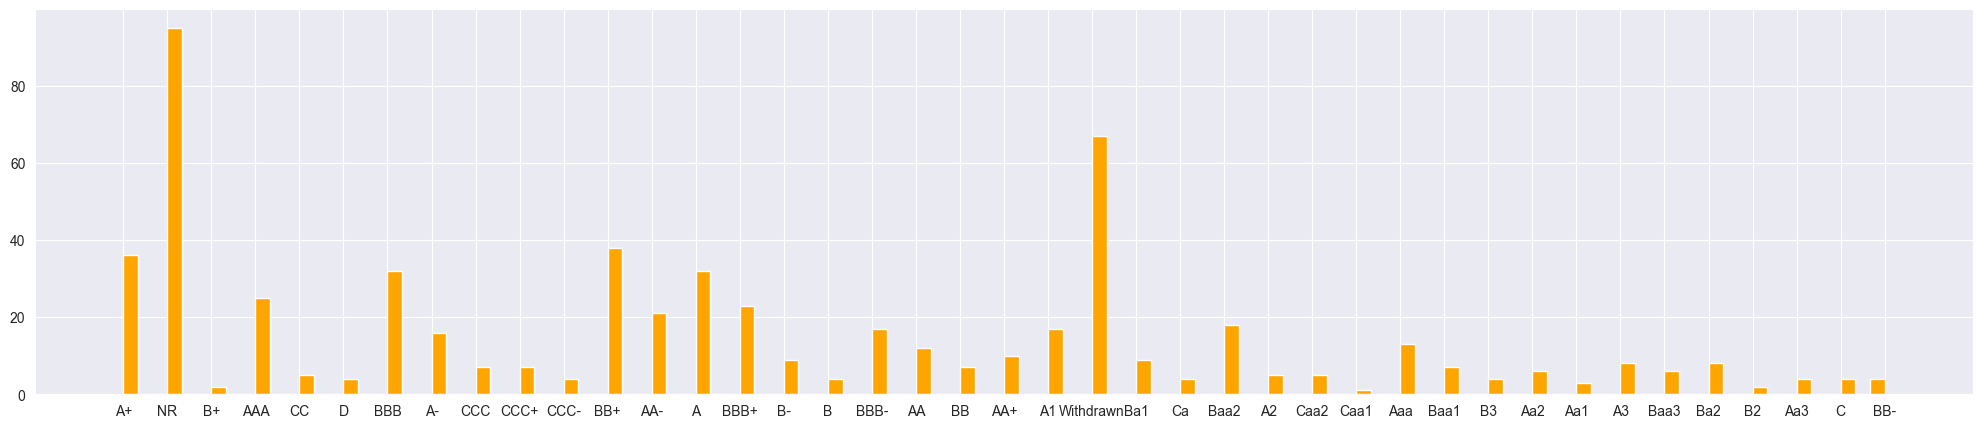

In [135]:
dfcsv1.Рейтинг.hist(bins=120, figsize=(25,5),
        color='Orange', 
        xlabelsize=10, ylabelsize=10);

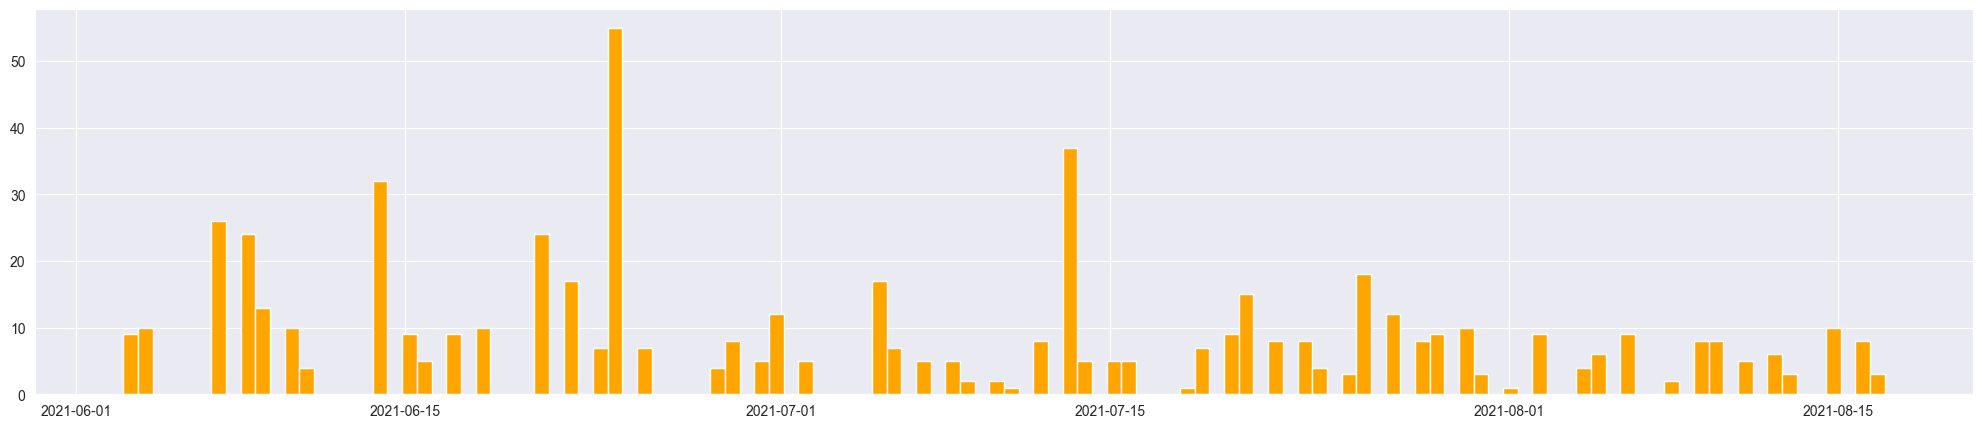

In [136]:
dfcsv1.data1.hist(bins=120, figsize=(25,5),
        color='Orange', 
        xlabelsize=10, ylabelsize=10);

In [137]:
dfcsv1['data2'] = pd.to_datetime(dfcsv1['data2'], format="%Y-%m-%d")

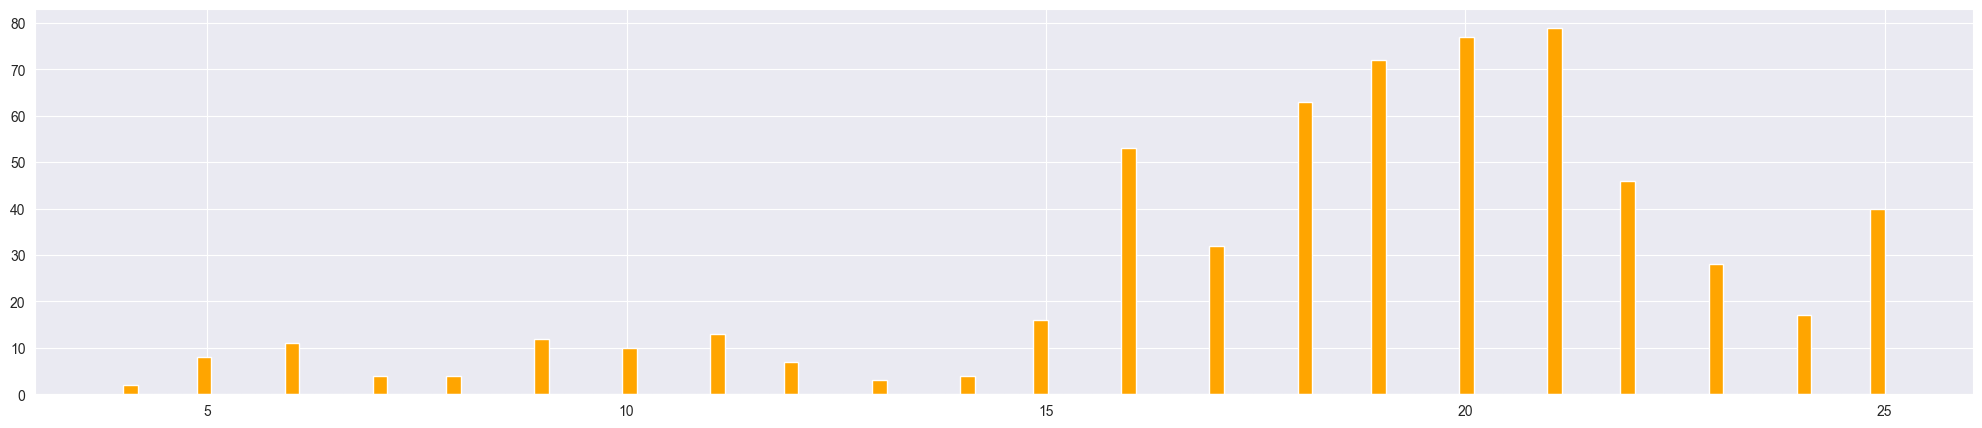

In [138]:
dfcsv1.РейтингID.hist(bins=120, figsize=(25,5),
        color='Orange', 
        xlabelsize=10, ylabelsize=10);

In [164]:
ds_hw_grow = dfcsv1.sort_values(["ВыпускID", "data1"])
ds_hw_grow

,data1,ВыпускID,Выпуск,id_ra,id_sc,Рейтинг,РейтингID,data2,name_ra,name_sc
0,2021-06-24,1,XS00000AA001,1,1,A+,21,2021-07-13,Рейтинговое агентство 1,Суверенная шкала
224,2021-07-13,1,XS00000AA001,3,6,A1,21,2021-07-21,Рейтинговое агентство 3,Международная шкала
401,2021-07-21,1,XS00000AA001,2,5,A+,21,2021-08-16,Рейтинговое агентство 2,Международная шкала
402,2021-08-16,1,XS00000AA001,2,5,NR,21,2021-08-17,Рейтинговое агентство 2,Международная шкала
1,2021-08-17,1,XS00000AA001,1,1,NR,21,2021-08-17,Рейтинговое агентство 1,Суверенная шкала
...,...,...,...,...,...,...,...,...,...,...
113,2021-06-24,99,XS00000AA099,1,1,B+,13,2021-06-25,Рейтинговое агентство 1,Суверенная шкала
515,2021-06-25,99,XS00000AA099,2,5,BBB-,17,2021-06-28,Рейтинговое агентство 2,Международная шкала
316,2021-06-28,99,XS00000AA099,3,6,Ba2,15,2021-07-05,Рейтинговое агентство 3,Международная шкала
516,2021-07-05,99,XS00000AA099,2,5,BBB-,17,2021-07-13,Рейтинговое агентство 2,Международная шкала


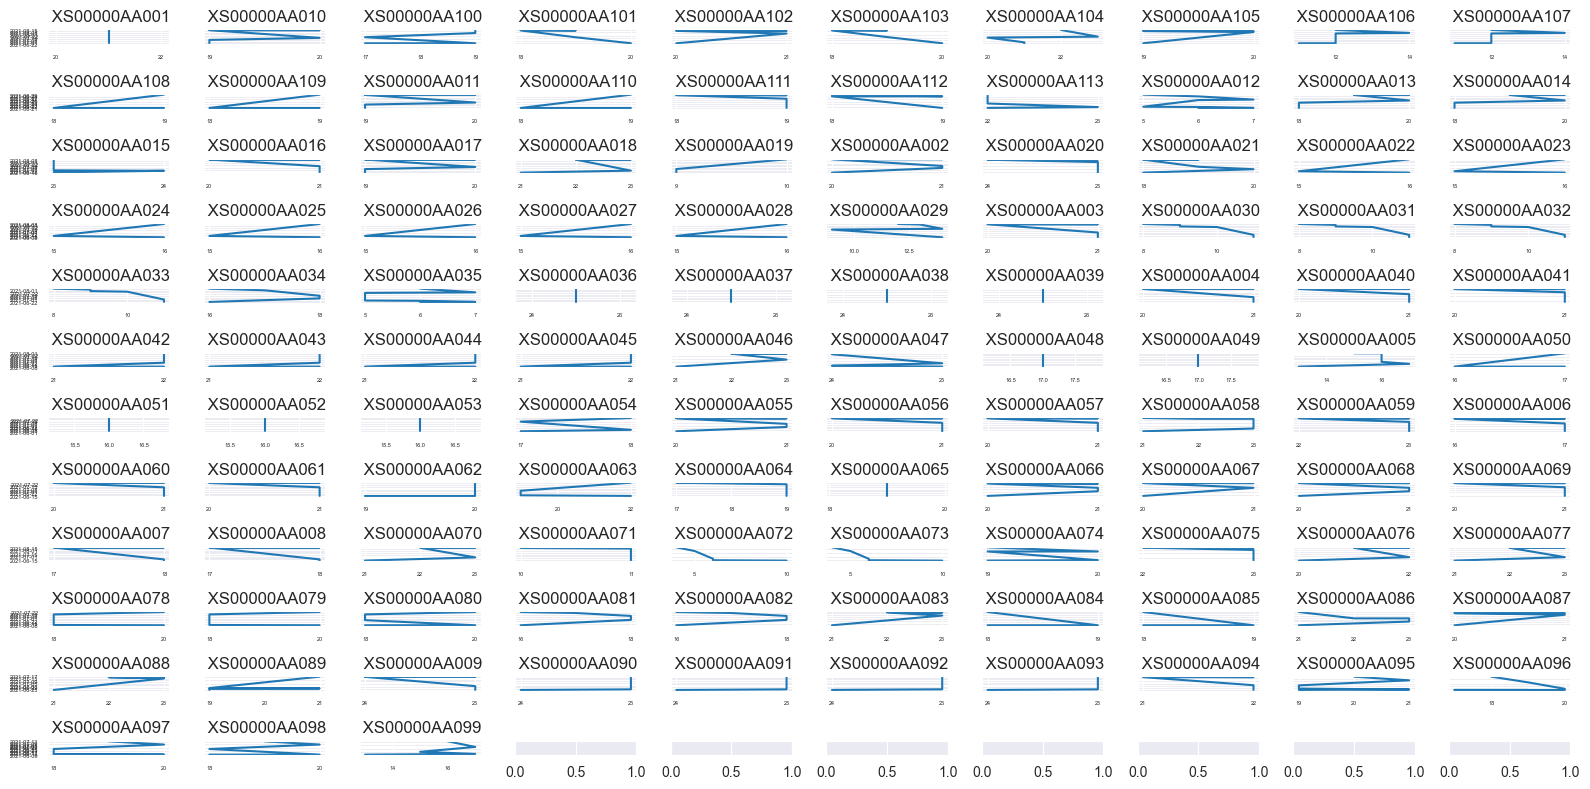

In [166]:
df = ds_hw_grow
n_vyp = df["Выпуск"].nunique()
n_cols = 10
n_rows = int(np.ceil(n_vyp / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 8))

for ii, vypusk in enumerate(df["Выпуск"].unique()):
    row, col = divmod(ii, n_cols)
    (df
     .query("Выпуск == @vypusk")
     .set_index("РейтингID")
     ["data1"]
     .plot(ax=axes[row, col], sharey=True, title=vypusk, grid=True, fontsize=4))
    axes[row, col].set_xlabel(None)

plt.tight_layout()

In [167]:
# группируем данные по выпуску
grouped = df.groupby('Выпуск')
result = pd.DataFrame(columns=['name', 'max_rg', 'max_rg_date', 'min_rg', 'min_rg_date'])
i=0

# Находим максимальный подъём рейтинга и максимальное снижение рейтинга для каждого выпуска
for name, group in grouped:
    max_rg = group['РейтингID'].max()
    min_rg = group['РейтингID'].min()

    max_rg_date = group.loc[group['РейтингID'] == max_rg, 'data1'].values[0]
    min_rg_date = group.loc[group['РейтингID'] == min_rg, 'data1'].values[0]

    #result = result.append({name, max_price, max_price_date, min_price, min_price_date})
    result.loc[i] = [name, max_rg, max_rg_date, min_rg, min_rg_date]
    i=i+1
result

,name,max_rg,max_rg_date,min_rg,min_rg_date
0,XS00000AA001,21,2021-06-24,21,2021-06-24
1,XS00000AA002,21,2021-07-13,20,2021-06-24
2,XS00000AA003,21,2021-06-24,20,2021-08-15
3,XS00000AA004,21,2021-06-24,20,2021-08-15
4,XS00000AA005,17,2021-07-05,13,2021-06-24
...,...,...,...,...,...
108,XS00000AA109,19,2021-06-21,18,2021-06-21
109,XS00000AA110,19,2021-06-21,18,2021-06-21
110,XS00000AA111,19,2021-06-03,18,2021-06-28
111,XS00000AA112,19,2021-06-17,18,2021-06-24


In [168]:
maxmin = result[result['max_rg'] - result['min_rg'] > 3]
maxmin

,name,max_rg,max_rg_date,min_rg,min_rg_date
4,XS00000AA005,17,2021-07-05,13,2021-06-24
28,XS00000AA029,14,2021-06-17,9,2021-07-16
71,XS00000AA072,10,2021-06-17,4,2021-07-23
72,XS00000AA073,10,2021-06-17,4,2021-07-23
98,XS00000AA099,17,2021-06-25,13,2021-06-24


In [169]:
maxmax = result[result['min_rg'] > 24]
maxmax

,name,max_rg,max_rg_date,min_rg,min_rg_date
35,XS00000AA036,25,2021-06-21,25,2021-06-21
36,XS00000AA037,25,2021-06-14,25,2021-06-14
37,XS00000AA038,25,2021-06-04,25,2021-06-04
38,XS00000AA039,25,2021-06-04,25,2021-06-04


In [170]:
minmin = result[result['max_rg'] < 11]
minmin

,name,max_rg,max_rg_date,min_rg,min_rg_date
11,XS00000AA012,7,2021-06-18,5,2021-06-23
18,XS00000AA019,10,2021-08-09,9,2021-06-03
34,XS00000AA035,7,2021-06-18,5,2021-06-23
71,XS00000AA072,10,2021-06-17,4,2021-07-23
72,XS00000AA073,10,2021-06-17,4,2021-07-23


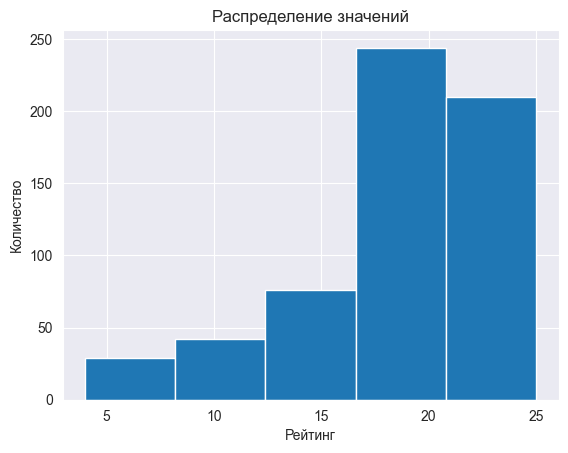

In [171]:
plt.hist(dfcsv1.РейтингID, bins=5)
plt.xlabel("Рейтинг")
plt.ylabel("Количество")
plt.title("Распределение значений")
plt.show()

In [172]:
dfv = pd.DataFrame(columns = ['ВыпускID', 'Движение'])
for i in range(n_vyp):
    dfv.loc[i+1] = [i+1, 0]

In [173]:
dfv

,ВыпускID,Движение
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
...,...,...
109,109,0
110,110,0
111,111,0
112,112,0


In [175]:
for i in range(dfcsv1.shape[0]-10):
    if dfcsv1['ВыпускID'][i] == dfcsv1['ВыпускID'][i+1]:
        ggg = 0
        iii = int(dfcsv1['ВыпускID'][i])
        if int(dfv['Движение'][iii]) > 0:
            ggg = int(dfv['Движение'][iii])
        dfv['Движение'][iii] = int(ggg + abs(dfcsv1['РейтингID'][i]-dfcsv1['РейтингID'][i+1]))

In [176]:
dfv[dfv.Движение > 5]

,ВыпускID,Движение
5,5,8
7,7,6
12,12,6
30,30,12
31,31,12
32,32,12
33,33,12
34,34,6
35,35,6
58,58,6
